In [1]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import random

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/minor project/flipkart_com-ecommerce_sample.csv')

In [ ]:
df.shape

(20000, 15)

In [ ]:
df[df.isnull().any(axis=1)].count()

uniq_id                    5942
crawl_timestamp            5942
product_url                5942
product_name               5942
product_category_tree      5942
pid                        5942
retail_price               5864
discounted_price           5864
image                      5939
is_FK_Advantage_product    5942
description                5940
product_rating             5942
overall_rating             5942
brand                        78
product_specifications     5928
dtype: int64

In [ ]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
df1=df.drop(["product_url","image","is_FK_Advantage_product","description","overall_rating","product_specifications"],axis=1)

In [ ]:
df1.head()

,uniq_id,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,No rating available,Sicons


In [ ]:
df2=df1.copy()
df2['discount']=round((100*(df2['retail_price']-df2['discounted_price'])/df2['retail_price']),2)
df2.head()

,uniq_id,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,No rating available,Alisha,62.06
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,No rating available,FabHomeDecor,29.58
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,No rating available,AW,50.05
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,No rating available,Alisha,61.80
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,No rating available,Sicons,4.55


In [ ]:
df3=df2.copy()
df3 = df3.groupby('product_name').apply(lambda x: x.assign(product_rating=random.randint(1, 5)))
df3.head(10)

<ipython-input-61-c61939f6eaf8>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df3 = df3.groupby('product_name').apply(lambda x: x.assign(product_rating=random.randint(1, 5)))


,uniq_id,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,1,Alisha,62.06
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,2,FabHomeDecor,29.58
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,4,AW,50.05
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,1,Alisha,61.80
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,5,Sicons,4.55
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,1,Eternal Gandhi,0.00
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,1,Alisha,60.05
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,2,FabHomeDecor,29.58
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,349.0,3,dilli bazaaar,50.07
9,4044c0ac52c1ee4b28777417651faf42,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVUHAAVH9X,1199.0,479.0,1,Alisha,60.05


In [ ]:
df4=df3.dropna()
df4.shape

(14071, 10)

In [ ]:
df4[df4.isnull().any(axis=1)].count()

uniq_id                  0
crawl_timestamp          0
product_name             0
product_category_tree    0
pid                      0
retail_price             0
discounted_price         0
product_rating           0
brand                    0
discount                 0
dtype: int64

In [ ]:
df5=df4
df5['shipping'] = np.where(df5['discounted_price'] <370, 40, 0)

<ipython-input-64-ca92afd394f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['shipping'] = np.where(df5['discounted_price'] <370, 40, 0)


In [ ]:
df5.head()

,uniq_id,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount,shipping
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,1,Alisha,62.06,0
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,2,FabHomeDecor,29.58,0
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,4,AW,50.05,0
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,1,Alisha,61.80,40
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,5,Sicons,4.55,40


In [ ]:
# grouped_df = df.groupby("product_name").size().reset_index(name="count")
# grouped_df.head(20)

In [ ]:
df5['crawl_timestamp'] = pd.to_datetime(df5['crawl_timestamp'])
# Extract the date from the 'crawl_timestamp' column
df5['date'] = df5['crawl_timestamp'].dt.date
df5['time'] = df5['crawl_timestamp'].dt.time

<ipython-input-67-57185415778e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['crawl_timestamp'] = pd.to_datetime(df5['crawl_timestamp'])
<ipython-input-67-57185415778e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['date'] = df5['crawl_timestamp'].dt.date
<ipython-input-67-57185415778e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
df5.head()

,uniq_id,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount,shipping,date,time
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,1,Alisha,62.06,0,2016-03-25,22:59:23
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,2,FabHomeDecor,29.58,0,2016-03-25,22:59:23
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,4,AW,50.05,0,2016-03-25,22:59:23
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,1,Alisha,61.80,40,2016-03-25,22:59:23
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,5,Sicons,4.55,40,2016-03-25,22:59:23


In [ ]:
df6=df5.drop(['crawl_timestamp'],axis=1)

In [ ]:
df6.head()

,uniq_id,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount,shipping,date,time
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,1,Alisha,62.06,0,2016-03-25,22:59:23
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,2,FabHomeDecor,29.58,0,2016-03-25,22:59:23
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,4,AW,50.05,0,2016-03-25,22:59:23
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,1,Alisha,61.80,40,2016-03-25,22:59:23
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,5,Sicons,4.55,40,2016-03-25,22:59:23


In [ ]:
product_A = df6[df6['product_name'] == "925 Silver Alloy Silver Bracelet"]
product_A

,uniq_id,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount,shipping,date,time
16801,1be1ba22aa449fd0698a266db21a5ffb,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDSZZHYGRG,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16802,2626ef6933f7769d36ce1016a7f2fe8d,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDJSJZ9YJB,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16803,ea2583397597f5212cf886ce2b95ba0e,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDY866N8E3,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16804,0aafbe15dd4fdcaa40a4f44857ffa97c,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDHKXKHAHZ,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16805,f6f5e545513dce21f4112dbc1a43e4e7,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDTFDW6BPD,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16806,16883336eee0606dcaf1a7619365e039,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDTVABF35T,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
16807,229afc41fbcfd936e0581128d5959869,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDT23SRB6W,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
17030,08cbb41183ce61cff7f89a333a68c5ff,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDGGWGZZBA,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17
17032,055fd4fe35affd3a9e50b79d78cd7131,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBADSEZDGVYZWJSE,1599.0,1498.0,3,925 Silver,6.32,0,2015-12-20,08:26:17


In [ ]:
unique_products = df6['product_name'].unique()

In [ ]:
unique_products

array(["Alisha Solid Women's Cycling Shorts",
       'FabHomeDecor Fabric Double Sofa Bed', 'AW Bellies', ...,
       'Wallmantra Small Vinyl Stickers Sticker',
       'Uberlyfe Large Vinyl Sticker',
       'Uberlyfe Extra Large Vinyl Sticker'], dtype=object)

In [ ]:
# df6.to_csv('/content/drive/MyDrive/minor project/flipkart2.csv', index=False)

In [ ]:
# df7=pd.read_csv('/content/drive/MyDrive/minor project/flipkart2.csv')

In [ ]:
df6['product_name'].nunique()

8892

In [ ]:
unique_category = df6['product_category_tree'].unique()

In [ ]:
df6['product_category_tree'].nunique()

4777

In [ ]:
unique_category

array(['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]',
       '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]',
       '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers"]'],
      dtype=object)

In [ ]:
grouped_df = df6.groupby('product_name')
# Display the groups
table = pd.concat([group for name, group in grouped_df])
table.head(100)

,uniq_id,product_name,product_category_tree,pid,retail_price,discounted_price,product_rating,brand,discount,shipping,date,time
14587,b0e55fae54f31a0f2c2ad453b28ad395,1OAK Women's Floral Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",SHTEHUY4DGTGAYBS,899.0,675.0,5,1OAK,24.92,0,2016-04-18,15:23:58
14590,07e80857cb14f8df31e503ad40bc45e0,1OAK Women's Polka Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",SHTEHUY55ARGYFJS,799.0,599.0,4,1OAK,25.03,0,2016-04-18,15:23:58
4143,152e0aa4b19e3687555fdca123e17943,3D Mat Floor Car Mat Toyota Innova,"[""Automotive >> Accessories & Spare parts >> C...",CRTE8ZZWHBBQ736Q,7250.0,6999.0,4,3D Mat,3.46,0,2015-12-01,12:40:44
5132,2ad41c2dc87185c82f8d4e113988eb1f,3a AUTOCARE Car Mat Chevrolet Beat,"[""Automotive >> Accessories & Spare parts >> C...",CRTEA7HANRC9HYK3,2250.0,1490.0,5,3a AUTOCARE,33.78,0,2015-12-01,12:40:44
4154,14c3b36f7e0699805999e7ec7bf2445d,3a AUTOCARE Car Mat Honda City,"[""Automotive >> Accessories & Spare parts >> C...",CRTEA7HAPG9RZMQD,2800.0,1850.0,5,3a AUTOCARE,33.93,0,2015-12-01,12:40:44
...,...,...,...,...,...,...,...,...,...,...,...,...
19912,e58c739e991af8302b4fa03c6b04263e,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBHTFPT2KR,999.0,599.0,1,999store,40.04,0,2015-12-01,10:15:43
19913,b02a2a5847820fc9478bf9dea78bacdb,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBJ5G4SNHH,999.0,599.0,1,999store,40.04,0,2015-12-01,10:15:43
19928,68dcd5354db2bd465f2cb3263ff4044d,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRB6MZ8JXBZ,999.0,599.0,1,999store,40.04,0,2015-12-01,10:15:43
19951,558db7e15ab018c828cd200a2239f578,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBSDPEUB8T,999.0,599.0,1,999store,40.04,0,2015-12-01,10:15:43


In [ ]:
# table.to_csv('/content/drive/MyDrive/minor project/flipkart3.csv', index=False)

In [ ]:
table['date'] = pd.to_datetime(table['date'])
table['year'] = table['date'].dt.year
table['year'] = '2021'
table['new_date'] = pd.to_datetime(table['year'].astype(str) + '-' + table['date'].dt.month.astype(str) + '-' + table['date'].dt.day.astype(str))
table['new_date'] = table['new_date'].dt.strftime('%Y-%m-%d')
df7 = table.drop(["time",'year','date','pid'],axis=1)
df7 = df7.rename(columns={'new_date': 'date'})
df7.to_csv('/content/drive/MyDrive/minor project/flipkart2.csv', index=False)

In [ ]:
df7.to_csv('/content/drive/MyDrive/minor project/flipkart3.csv', index=False)

In [70]:
dummy=pd.read_csv('/content/drive/MyDrive/minor project/flipkart2.csv')
dummy.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date
0,b0e55fae54f31a0f2c2ad453b28ad395,1OAK Women's Floral Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",899.0,675.0,5,1OAK,24.92,0,2021-04-18
1,07e80857cb14f8df31e503ad40bc45e0,1OAK Women's Polka Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",799.0,599.0,4,1OAK,25.03,0,2021-04-18
2,152e0aa4b19e3687555fdca123e17943,3D Mat Floor Car Mat Toyota Innova,"[""Automotive >> Accessories & Spare parts >> C...",7250.0,6999.0,4,3D Mat,3.46,0,2021-12-01
3,2ad41c2dc87185c82f8d4e113988eb1f,3a AUTOCARE Car Mat Chevrolet Beat,"[""Automotive >> Accessories & Spare parts >> C...",2250.0,1490.0,5,3a AUTOCARE,33.78,0,2021-12-01
4,14c3b36f7e0699805999e7ec7bf2445d,3a AUTOCARE Car Mat Honda City,"[""Automotive >> Accessories & Spare parts >> C...",2800.0,1850.0,5,3a AUTOCARE,33.93,0,2021-12-01


In [389]:
df8=pd.read_csv('/content/drive/MyDrive/minor project/flipkart3 - flipkart3.csv')
# df8=pd.read_csv('/content/drive/MyDrive/minor project/Copy of flipkart4 - flipkart4.csv')

In [390]:
print(df8['date'].dtype)

object


In [240]:
# df8['date'] = df8['date'].str.replace('30-02-2021','28-02-2021')

In [391]:
df8.head(4)

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date
0,b0e55fae54f31a0f2c2ad453b28ad395,1OAK Women's Floral Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",899,675,5,1OAK,24.92,0,10/01/2021
1,07e80857cb14f8df31e503ad40bc45e0,1OAK Women's Polka Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",799,599,4,1OAK,25.03,0,25/01/2021
2,152e0aa4b19e3687555fdca123e17943,3D Mat Floor Car Mat Toyota Innova,"[""Automotive >> Accessories & Spare parts >> C...",7250,6999,4,3D Mat,3.46,0,10/01/2021
3,2ad41c2dc87185c82f8d4e113988eb1f,3a AUTOCARE Car Mat Chevrolet Beat,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,5,3a AUTOCARE,33.78,0,10/01/2021


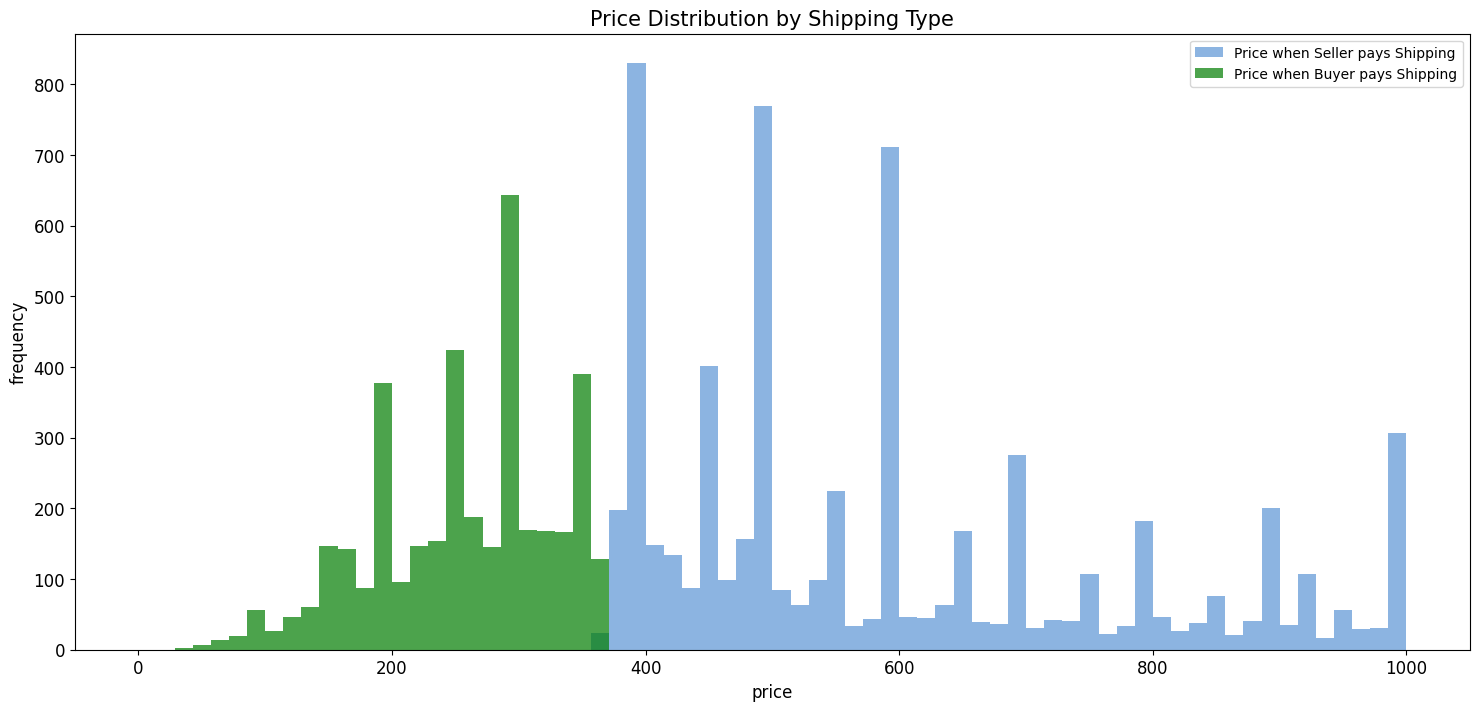

In [392]:
shipping_fee_by_buyer = df8.loc[df8['shipping'] != 0, 'discounted_price']
shipping_fee_by_seller = df8.loc[df8['shipping'] ==0, 'discounted_price']

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(shipping_fee_by_seller, color='#8CB4E1', alpha=1.0, bins=70, range = [0, 1000],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='#007D00', alpha=0.7, bins=70, range = [0, 1000],
       label='Price when Buyer pays Shipping')
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [393]:
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 3219.69 if seller pays shipping
The average price is 257.46 if buyer pays shipping


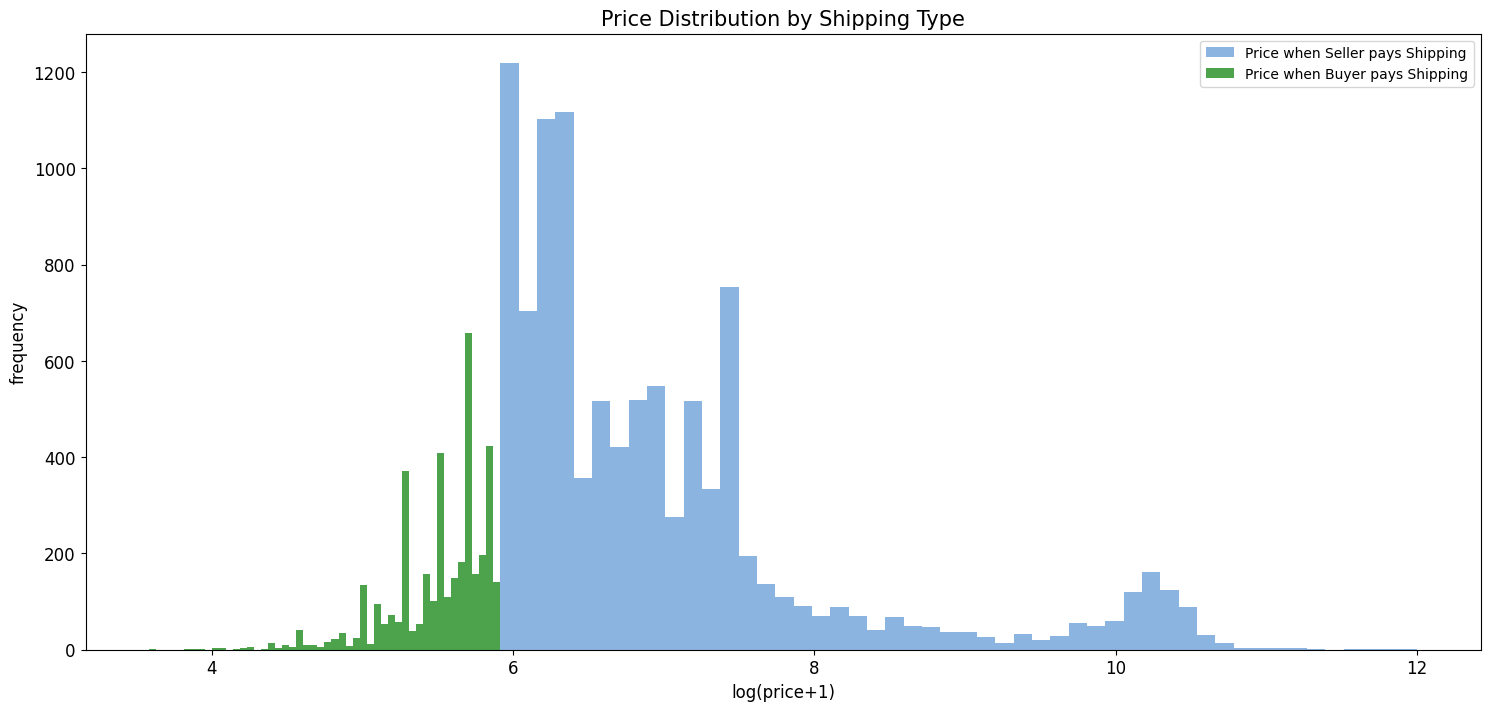

In [394]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(shipping_fee_by_seller+1), color='#8CB4E1', alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(shipping_fee_by_buyer+1), color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
plt.xlabel('log(price+1)', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price Distribution')

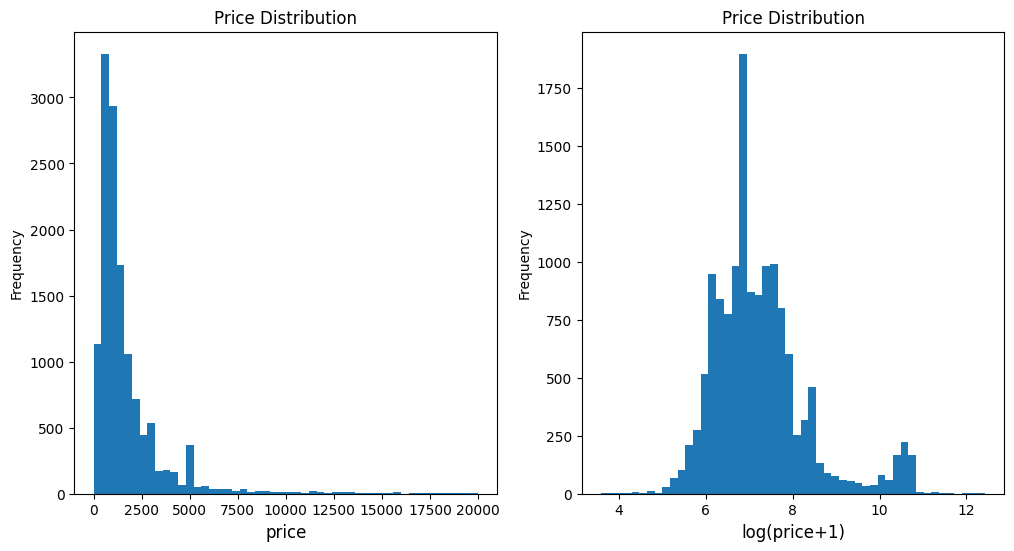

In [395]:
plt.subplot(1, 2, 1)
(df8['retail_price']).plot.hist(bins=50, figsize=(12, 6), range = [0, 20000])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log(df8['retail_price']+1).plot.hist(bins=50, figsize=(12,6))
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

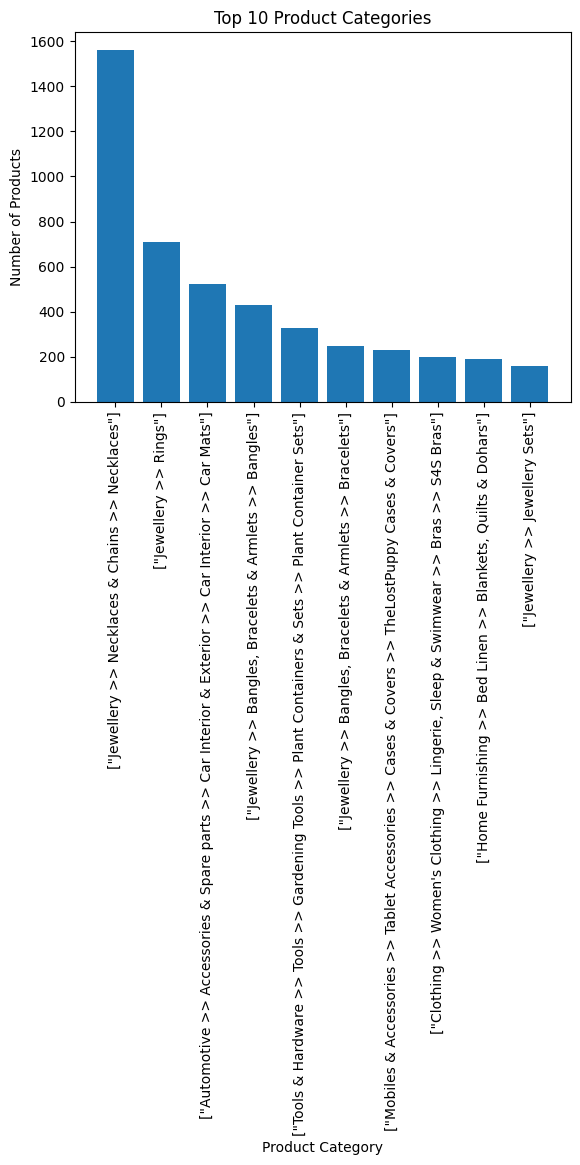

In [396]:
category_counts = df8['product_category_tree'].value_counts().head(10)
categories = category_counts.index.tolist()
counts = category_counts.tolist()
plt.bar(categories, counts)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Top 10 Product Categories')
plt.show()

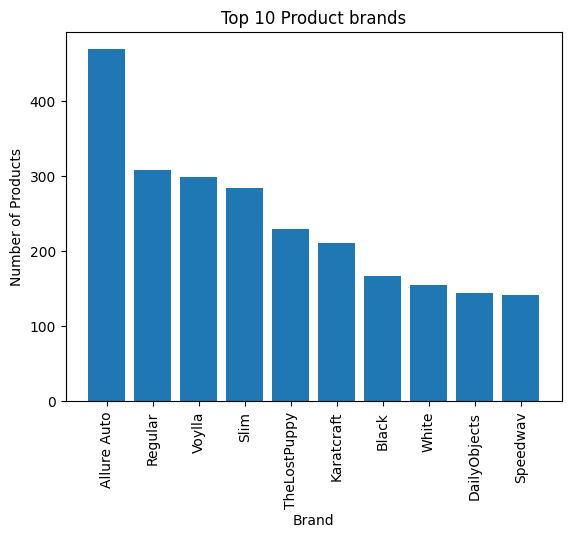

In [397]:
category_counts = df8['brand'].value_counts().head(10)
categories = category_counts.index.tolist()
counts = category_counts.tolist()
plt.bar(categories, counts)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 10 Product brands')
plt.show()

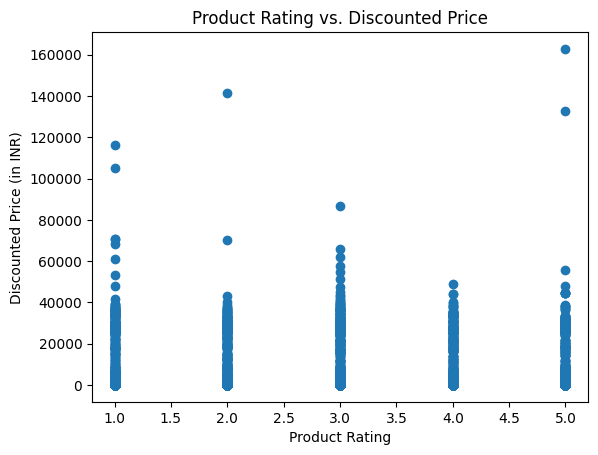

In [398]:
plt.scatter(df8['product_rating'], df8['discounted_price'])
plt.xlabel('Product Rating')
plt.ylabel('Discounted Price (in INR)')
plt.title('Product Rating vs. Discounted Price')
plt.show()

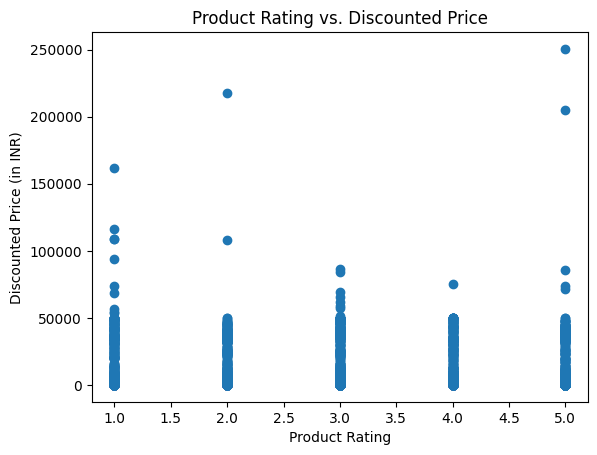

In [399]:
plt.scatter(df8['product_rating'], df8['retail_price'])
plt.xlabel('Product Rating')
plt.ylabel('Discounted Price (in INR)')
plt.title('Product Rating vs. Discounted Price')
plt.show()

In [400]:
df8.shape

(14071, 10)

In [401]:
my_df=df8

In [402]:
unique_id = df8['uniq_id'].nunique()
unique_id

14071

In [403]:
unique_id = df8['product_category_tree'].nunique()
unique_id

4777

In [404]:
print(df8['date'].dtype)

object


In [313]:
# df8['date'] = df8['date'].astype('object')

In [387]:
# from datetime import datetime
# df8['date'] = pd.to_datetime(df8['date'])
# df8['date'] = df8['date'].dt.strftime('%Y-%m-%d')

In [384]:
print(df8['date'].dtype)

object


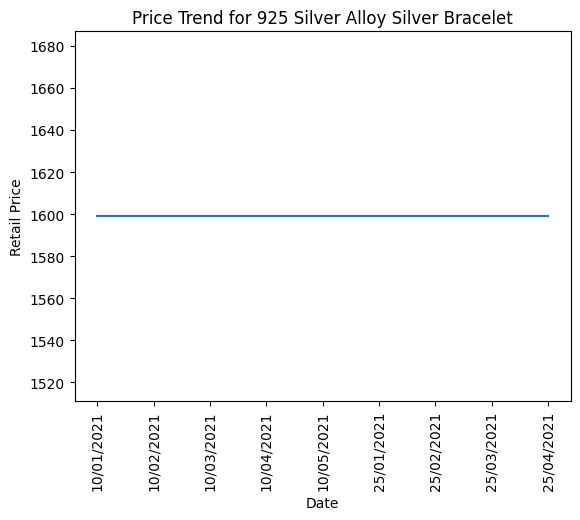

In [405]:
product_name = '925 Silver Alloy Silver Bracelet'
product_df = df8[df8['product_name'] == product_name]
grouped_df = product_df.groupby('date')['retail_price'].mean().reset_index()

# Plot the line chart
plt.plot(grouped_df['date'], grouped_df['retail_price'])

# Add labels and title to the plot
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Retail Price')
plt.title('Price Trend for ' + product_name)

# Display the plot
plt.show()

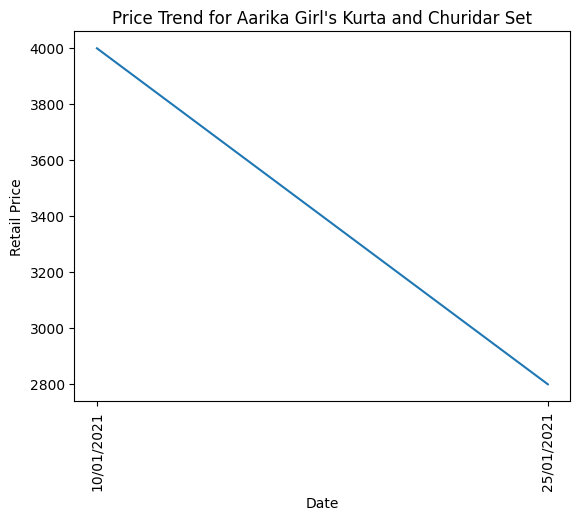

In [406]:
product_name = "Aarika Girl's Kurta and Churidar Set"
product_df = df8[df8['product_name'] == product_name]
grouped_df = product_df.groupby('date')['retail_price'].mean().reset_index()

# Plot the line chart
plt.plot(grouped_df['date'], grouped_df['retail_price'])

# Add labels and title to the plot
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Retail Price')
plt.title('Price Trend for ' + product_name)

# Display the plot
plt.show()

In [407]:
product_A = df8[df8['product_name'] == "925 Silver Alloy Silver Bracelet"]
product_A

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date
64,1be1ba22aa449fd0698a266db21a5ffb,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,10/01/2021
65,2626ef6933f7769d36ce1016a7f2fe8d,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,25/01/2021
66,ea2583397597f5212cf886ce2b95ba0e,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,10/02/2021
67,0aafbe15dd4fdcaa40a4f44857ffa97c,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,25/02/2021
68,f6f5e545513dce21f4112dbc1a43e4e7,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,10/03/2021
69,16883336eee0606dcaf1a7619365e039,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,25/03/2021
70,229afc41fbcfd936e0581128d5959869,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,10/04/2021
71,08cbb41183ce61cff7f89a333a68c5ff,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,25/04/2021
72,055fd4fe35affd3a9e50b79d78cd7131,925 Silver Alloy Silver Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",1599,1498,3,925 Silver,6.32,0,10/05/2021


In [408]:
product_A = df8[df8['product_name'] == "Aarika Girl's Kurta and Churidar Set"]
product_A

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date
373,a0a73fd6061a7b7d5f85defc0b33f99d,Aarika Girl's Kurta and Churidar Set,"[""Clothing >> Kids' Clothing >> Girls Wear >> ...",3999,1596,3,Aarika,60.09,0,10/01/2021
374,e5959c024486821778a3edb82f300889,Aarika Girl's Kurta and Churidar Set,"[""Clothing >> Kids' Clothing >> Girls Wear >> ...",2799,1119,3,Aarika,60.02,0,25/01/2021


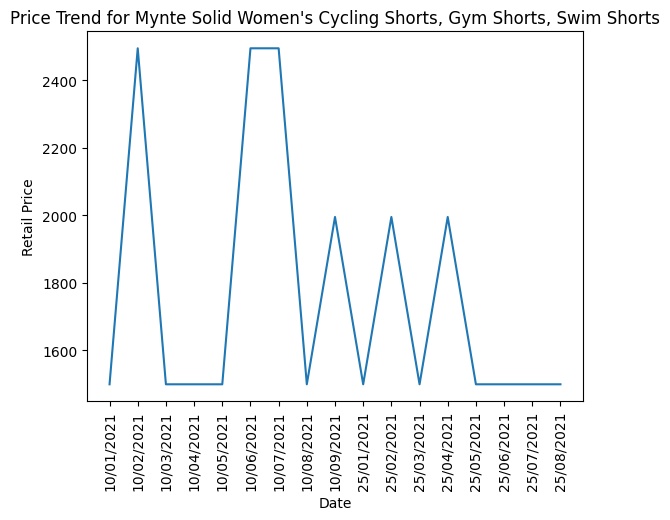

In [409]:
product_name = "Mynte Solid Women's Cycling Shorts, Gym Shorts, Swim Shorts"
product_df = df8[df8['product_name'] == product_name]
grouped_df = product_df.groupby('date')['retail_price'].mean().reset_index()

# Plot the line chart
plt.plot(grouped_df['date'], grouped_df['retail_price'])

# Add labels and title to the plot
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Retail Price')
plt.title('Price Trend for ' + product_name)

# Display the plot
plt.show()

In [364]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [410]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df8["uniq_id"])
df8["Unique_id"] = encoder.transform(df8["uniq_id"])
df8.head(20)

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date,Unique_id
0,b0e55fae54f31a0f2c2ad453b28ad395,1OAK Women's Floral Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",899,675,5,1OAK,24.92,0,10/01/2021,9760
1,07e80857cb14f8df31e503ad40bc45e0,1OAK Women's Polka Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",799,599,4,1OAK,25.03,0,25/01/2021,435
2,152e0aa4b19e3687555fdca123e17943,3D Mat Floor Car Mat Toyota Innova,"[""Automotive >> Accessories & Spare parts >> C...",7250,6999,4,3D Mat,3.46,0,10/01/2021,1184
3,2ad41c2dc87185c82f8d4e113988eb1f,3a AUTOCARE Car Mat Chevrolet Beat,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,5,3a AUTOCARE,33.78,0,10/01/2021,2329
4,14c3b36f7e0699805999e7ec7bf2445d,3a AUTOCARE Car Mat Honda City,"[""Automotive >> Accessories & Spare parts >> C...",2800,1850,5,3a AUTOCARE,33.93,0,10/01/2021,1165
5,fae160e68db4e64a22ad0e414dc456fb,3a AUTOCARE Car Mat Honda Mobilio,"[""Automotive >> Accessories & Spare parts >> C...",3000,2350,1,3a AUTOCARE,21.67,0,10/01/2021,13794
6,c15e90bbb0f477b010acc5c890ea0c4c,3a AUTOCARE Car Mat Hyundai Grand i10,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,3,3a AUTOCARE,33.78,0,10/01/2021,10665
7,d227c86f231af1617edde80d3723f6a3,3a AUTOCARE Car Mat Hyundai Grand i10,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,3,3a AUTOCARE,33.78,0,25/01/2021,11586
8,bd37cdae508edf892d352b844cd227ca,3a AUTOCARE Car Mat Hyundai Santro,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,1,3a AUTOCARE,33.78,0,10/01/2021,10447
9,2b1f1ed2fa590560a7160c27900592bd,3a AUTOCARE Car Mat Hyundai Verna,"[""Automotive >> Accessories & Spare parts >> C...",2800,1790,2,3a AUTOCARE,36.07,0,10/01/2021,2342


In [411]:
df8[df8.isnull().any(axis=1)].count()

uniq_id                  0
product_name             0
product_category_tree    0
retail_price             0
discounted_price         0
product_rating           0
brand                    0
discount                 0
shipping                 0
date                     0
Unique_id                0
dtype: int64

In [412]:
df8=df8.dropna()

In [431]:
import category_encoders as ce
cat_cols = ['product_name', 'brand', 'product_category_tree']
count_enc = ce.CountEncoder(cols=cat_cols)
df_count = count_enc.fit_transform(df8)
hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
df_hash = hash_enc.fit_transform(df8)
df9 = pd.concat([df8, df_hash], axis=1)

In [432]:
print(df8['date'].dtype)

object


In [433]:
df8.head()

,uniq_id,product_name,product_category_tree,retail_price,discounted_price,product_rating,brand,discount,shipping,date,Unique_id
0,b0e55fae54f31a0f2c2ad453b28ad395,1OAK Women's Floral Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",899,675,5,1OAK,24.92,0,10/01/2021,9760
1,07e80857cb14f8df31e503ad40bc45e0,1OAK Women's Polka Print Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",799,599,4,1OAK,25.03,0,25/01/2021,435
2,152e0aa4b19e3687555fdca123e17943,3D Mat Floor Car Mat Toyota Innova,"[""Automotive >> Accessories & Spare parts >> C...",7250,6999,4,3D Mat,3.46,0,10/01/2021,1184
3,2ad41c2dc87185c82f8d4e113988eb1f,3a AUTOCARE Car Mat Chevrolet Beat,"[""Automotive >> Accessories & Spare parts >> C...",2250,1490,5,3a AUTOCARE,33.78,0,10/01/2021,2329
4,14c3b36f7e0699805999e7ec7bf2445d,3a AUTOCARE Car Mat Honda City,"[""Automotive >> Accessories & Spare parts >> C...",2800,1850,5,3a AUTOCARE,33.93,0,10/01/2021,1165


In [434]:
df_hash.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,uniq_id,retail_price,discounted_price,product_rating,discount,shipping,date,Unique_id
0,0,0,0,0,0,0,1,0,0,2,b0e55fae54f31a0f2c2ad453b28ad395,899,675,5,24.92,0,10/01/2021,9760
1,0,1,0,1,0,0,0,0,0,1,07e80857cb14f8df31e503ad40bc45e0,799,599,4,25.03,0,25/01/2021,435
2,0,0,0,0,0,1,0,0,1,1,152e0aa4b19e3687555fdca123e17943,7250,6999,4,3.46,0,10/01/2021,1184
3,0,1,0,0,0,0,1,0,1,0,2ad41c2dc87185c82f8d4e113988eb1f,2250,1490,5,33.78,0,10/01/2021,2329
4,0,1,0,1,0,0,0,0,1,0,14c3b36f7e0699805999e7ec7bf2445d,2800,1850,5,33.93,0,10/01/2021,1165


In [435]:
data=df_hash.drop(['uniq_id'],axis=1)

In [436]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,retail_price,discounted_price,product_rating,discount,shipping,date,Unique_id
0,0,0,0,0,0,0,1,0,0,2,899,675,5,24.92,0,10/01/2021,9760
1,0,1,0,1,0,0,0,0,0,1,799,599,4,25.03,0,25/01/2021,435
2,0,0,0,0,0,1,0,0,1,1,7250,6999,4,3.46,0,10/01/2021,1184
3,0,1,0,0,0,0,1,0,1,0,2250,1490,5,33.78,0,10/01/2021,2329
4,0,1,0,1,0,0,0,0,1,0,2800,1850,5,33.93,0,10/01/2021,1165


In [437]:
data.shape

(14071, 17)

In [440]:
data['date'] = data['date'].str.replace('1/17/2021', '17/1/2021')

In [443]:
data['date'] = data['date'].str.replace('02-02--2021', '02/02/2021')

In [445]:
data['date'] = data['date'].str.replace('30-02-2021', '28/02/2021')

In [451]:
# data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# # extract day, month, and year components
# data['day'] = df['date'].dt.day
# data['month'] = data['date'].dt.month
# data['year'] = data['date'].dt.year
# # Drop the original date column
# data.drop('date', axis=1, inplace=True)
data['date'] = pd.to_datetime(data['date'])

# extract day, month, and year components
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# drop original 'date' column
data.drop('date', axis=1, inplace=True)
data.head(67)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,retail_price,discounted_price,product_rating,discount,shipping,Unique_id,day,month,year
0,0,0,0,0,0,0,1,0,0,2,899,675,5,24.92,0,9760,10,1,2021
1,0,1,0,1,0,0,0,0,0,1,799,599,4,25.03,0,435,25,1,2021
2,0,0,0,0,0,1,0,0,1,1,7250,6999,4,3.46,0,1184,10,1,2021
3,0,1,0,0,0,0,1,0,1,0,2250,1490,5,33.78,0,2329,10,1,2021
4,0,1,0,1,0,0,0,0,1,0,2800,1850,5,33.93,0,1165,10,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,0,0,0,2,0,0,0,0,0,8490,8490,2,0.00,0,1660,10,1,2021
63,0,0,0,0,0,1,0,0,1,1,7499,6374,5,15.00,0,11679,10,1,2021
64,0,0,0,0,0,1,0,0,1,1,1599,1498,3,6.32,0,1546,10,1,2021
65,0,0,0,0,0,1,0,0,1,1,1599,1498,3,6.32,0,2057,25,1,2021


In [ ]:
# data['date'] = pd.to_datetime(data['date'])

In [452]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,retail_price,discounted_price,product_rating,discount,shipping,Unique_id,day,month,year
0,0,0,0,0,0,0,1,0,0,2,899,675,5,24.92,0,9760,10,1,2021
1,0,1,0,1,0,0,0,0,0,1,799,599,4,25.03,0,435,25,1,2021
2,0,0,0,0,0,1,0,0,1,1,7250,6999,4,3.46,0,1184,10,1,2021
3,0,1,0,0,0,0,1,0,1,0,2250,1490,5,33.78,0,2329,10,1,2021
4,0,1,0,1,0,0,0,0,1,0,2800,1850,5,33.93,0,1165,10,1,2021


In [456]:
data.head(67)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,retail_price,discounted_price,product_rating,discount,shipping,Unique_id,day,month,year
0,0,0,0,0,0,0,1,0,0,2,899,675,5,24.92,0,9760,10,1,2021
1,0,1,0,1,0,0,0,0,0,1,799,599,4,25.03,0,435,25,1,2021
2,0,0,0,0,0,1,0,0,1,1,7250,6999,4,3.46,0,1184,10,1,2021
3,0,1,0,0,0,0,1,0,1,0,2250,1490,5,33.78,0,2329,10,1,2021
4,0,1,0,1,0,0,0,0,1,0,2800,1850,5,33.93,0,1165,10,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,0,0,0,2,0,0,0,0,0,8490,8490,2,0.00,0,1660,10,1,2021
63,0,0,0,0,0,1,0,0,1,1,7499,6374,5,15.00,0,11679,10,1,2021
64,0,0,0,0,0,1,0,0,1,1,1599,1498,3,6.32,0,1546,10,1,2021
65,0,0,0,0,0,1,0,0,1,1,1599,1498,3,6.32,0,2057,25,1,2021


In [454]:
data=data.dropna()
data.shape

(14071, 19)

In [465]:
import lightgbm as lgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = data.drop(['retail_price'], axis=1)  # features
y = data['retail_price']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
model = lgb.LGBMRegressor(**params)
# train LightGBM model on training data
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
# make predictions on test data
with open('/content/drive/MyDrive/minor project/lgbm_model.pkl', 'wb') as f:
    pickle.dump(model, f)
y_pred = model.predict(X_test)
# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
# calculate root mean squared error
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse*0.0000001}")
print(f"Root Mean Squared Error: {rmse*0.0001}")

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Mean Squared Error: 0.4494819608015224
Root Mean Squared Error: 0.21200989618447588


In [458]:
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,discounted_price,product_rating,discount,shipping,Unique_id,day,month,year
0,0,0,0,0,0,0,1,0,0,2,675,5,24.92,0,9760,10,1,2021
1,0,1,0,1,0,0,0,0,0,1,599,4,25.03,0,435,25,1,2021
2,0,0,0,0,0,1,0,0,1,1,6999,4,3.46,0,1184,10,1,2021
3,0,1,0,0,0,0,1,0,1,0,1490,5,33.78,0,2329,10,1,2021
4,0,1,0,1,0,0,0,0,1,0,1850,5,33.93,0,1165,10,1,2021


In [459]:
model.score(X_test,y_test)

0.9471705833701073

In [467]:
predicted_price = model.predict([[0,0,0,0,0,1,0,0,1,1,6999,4,3.46,0,1184,10,1,2021]])
print(f'Optimized price: {round(predicted_price[0], 2)}')

Optimized price: 7139.22


In [468]:
predicted_price = model.predict([[0	,1,	0	,0	,0	,0	,1	,0	,1	,0	,1490,	5,	33.78,	0,	2329,	10,	1,	2021]])
print(f'Optimized price: {round(predicted_price[0], 2)}')

Optimized price: 2056.18


In [469]:
predicted_price = model.predict([[0,	0	,0	,0	,0	,0	,1	,0	,0	,2	,675,	5	,24.92,	0	,9760	,10,	1,	2021]])
print(f'Optimized price: {round(predicted_price[0], 2)}')

Optimized price: 1558.96


In [470]:
predicted_price = model.predict([[0	,1	,0	,1	,0	,0	,0	,0	,1	,0	,1850,	5	,33.93	,0	,1165	,10,	1,	2021]])
print(f'Optimized price: {round(predicted_price[0], 2)}')

Optimized price: 2643.98


In [462]:
import category_encoders as ce
product_name ='925 Silver Alloy Silver Bracelet' 
brand = '["Jewellery >> Bangles, Bracelets & Armlets >> Bracelets"]'
category_tree='925 Silver'
cat_cols = [product_name, brand, category_tree]
hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
input_df = pd.DataFrame({'discounted_price': [1498],'product_rating': [3],'discount': [6.32],'shipping': [0],'Unique_id': [category_tree],'day': [10],'month': [1],'year': [2021]})
print(hash_enc)
df_hash = hash_enc.fit_transform(input_df)
# Encode input values using Count Encoding and Hashing Encoding
predicted_price = model.predict(df_hash)

print(f'Optimized price: {round(predicted_price[0], 2)}')

HashingEncoder(cols=['925 Silver Alloy Silver Bracelet',
                     '["Jewellery >> Bangles, Bracelets & Armlets >> '
                     'Bracelets"]',
                     '925 Silver'],
               max_process=1, n_components=10)


ValueError: ignored

In [ ]:
product_name ='925 Silver Alloy Silver Bracelet' 
brand='925 Silver'
# category_name = df8.loc[df8['product_name'] == product_name (df8['brand'] == brand) , 'discounted_price'].values[0]
product = df8[(df8['product_name'] == product_name) & 
             (df8['brand'] == brand)]['discounted_price'].values[0]
print(product)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(df8["product_name"])
# df8["product_id"] = encoder.transform(df8["product_name"])
# df8.head(20)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(df8["brand"])
# df8["Brand"] = encoder.transform(df8["brand"])
# df8.head(20)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(df8["product_category_tree"])
# df8["category"] = encoder.transform(df8["product_category_tree"])
# df8.head(20)

In [ ]:
# product_freq = df8['product_name'].value_counts(normalize=True)
# category_freq = df8['product_category_tree'].value_counts(normalize=True)
# df8['Product Name Encoded'] = df8['product_name'].map(product_freq)
# df8['Category Encoded'] = df8['product_category_tree'].map(category_freq)
# df8.head(10)